# Clustering the Countries by using Unsupervised Learning for HELP International
Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


# EDA

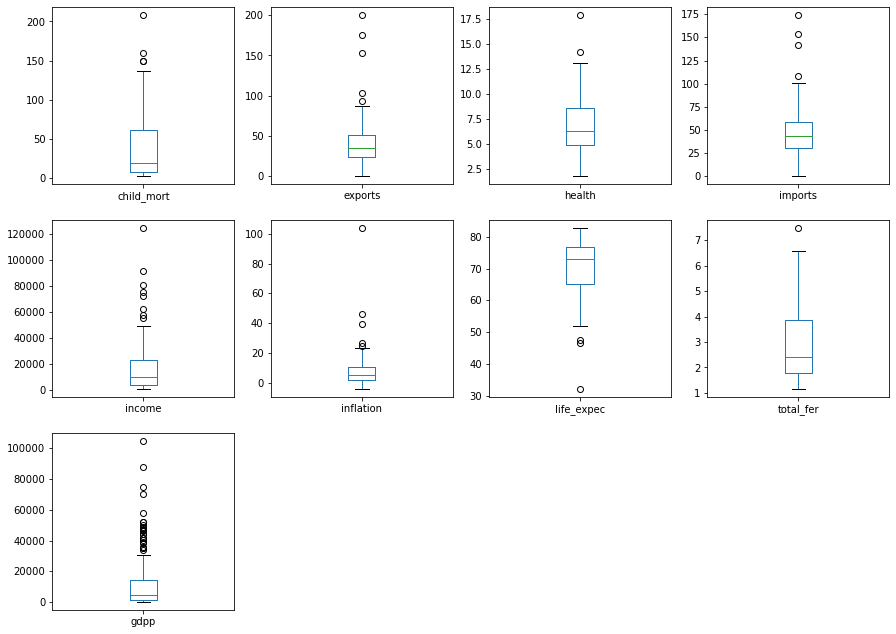

In [5]:
df.plot(kind="box", subplots = True,layout = (4,4),figsize=(15,15))
plt.show()

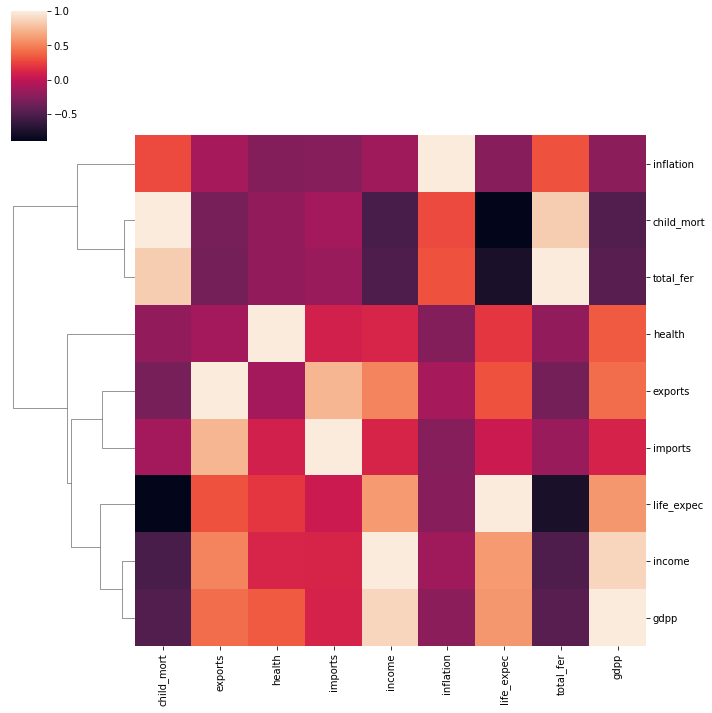

In [6]:
sns.clustermap(data=df.corr(),col_cluster=False)

# Data preprocessing

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# one-hot encoding

In [8]:
df = pd.get_dummies(df,drop_first=True)

# Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scale = StandardScaler()

In [11]:
scaled_X = scale.fit_transform(df)

In [12]:
scaled_X

array([[ 1.29153238e+00, -1.13827979e+00,  2.79088247e-01, ...,
        -7.76150526e-02, -7.76150526e-02, -7.76150526e-02],
       [-5.38948897e-01, -4.79658426e-01, -9.70161825e-02, ...,
        -7.76150526e-02, -7.76150526e-02, -7.76150526e-02],
       [-2.72832734e-01, -9.91216387e-02, -9.66073021e-01, ...,
        -7.76150526e-02, -7.76150526e-02, -7.76150526e-02],
       ...,
       [-3.72315412e-01,  1.13030491e+00,  8.87729775e-03, ...,
         1.28840987e+01, -7.76150526e-02, -7.76150526e-02],
       [ 4.48416682e-01, -4.06478275e-01, -5.97271589e-01, ...,
        -7.76150526e-02,  1.28840987e+01, -7.76150526e-02],
       [ 1.11495062e+00, -1.50347745e-01, -3.38015138e-01, ...,
        -7.76150526e-02, -7.76150526e-02,  1.28840987e+01]])

# PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca_model = PCA(n_components=2)

In [15]:
pc = pca_model.fit_transform(scaled_X)

In [16]:
pc

array([[-2.61568250e+00,  7.45639359e-02],
       [ 4.74869622e-01, -7.55044951e-01],
       [-3.24528539e-01, -5.83260089e-01],
       [-3.27772301e+00,  2.18004742e+00],
       [ 1.14937779e+00,  1.75811184e-01],
       [ 1.99131785e-02, -2.28498677e+00],
       [-1.19252972e-01, -7.28847629e-01],
       [ 2.61198495e+00, -2.55569890e+00],
       [ 3.31771373e+00, -9.45478738e-01],
       [-2.08383091e-01, -5.16399073e-01],
       [ 1.41304441e+00, -8.43999271e-01],
       [ 1.86063437e+00,  7.21332766e-01],
       [-1.26064978e+00, -1.23356457e+00],
       [ 1.20320594e+00, -6.19350964e-01],
       [ 6.41992142e-01,  6.88711460e-01],
       [ 3.50772858e+00,  8.50848782e-01],
       [ 2.31104653e-01,  8.98985580e-01],
       [-2.98625806e+00,  5.38060628e-01],
       [-1.79536695e-01,  9.99509258e-01],
       [-8.91443440e-01, -1.53328850e-01],
       [ 1.10816913e+00, -1.24912250e+00],
       [-9.87606194e-01,  5.87689582e-01],
       [ 1.52747028e-01, -2.76331923e+00],
       [ 2.

<AxesSubplot:>

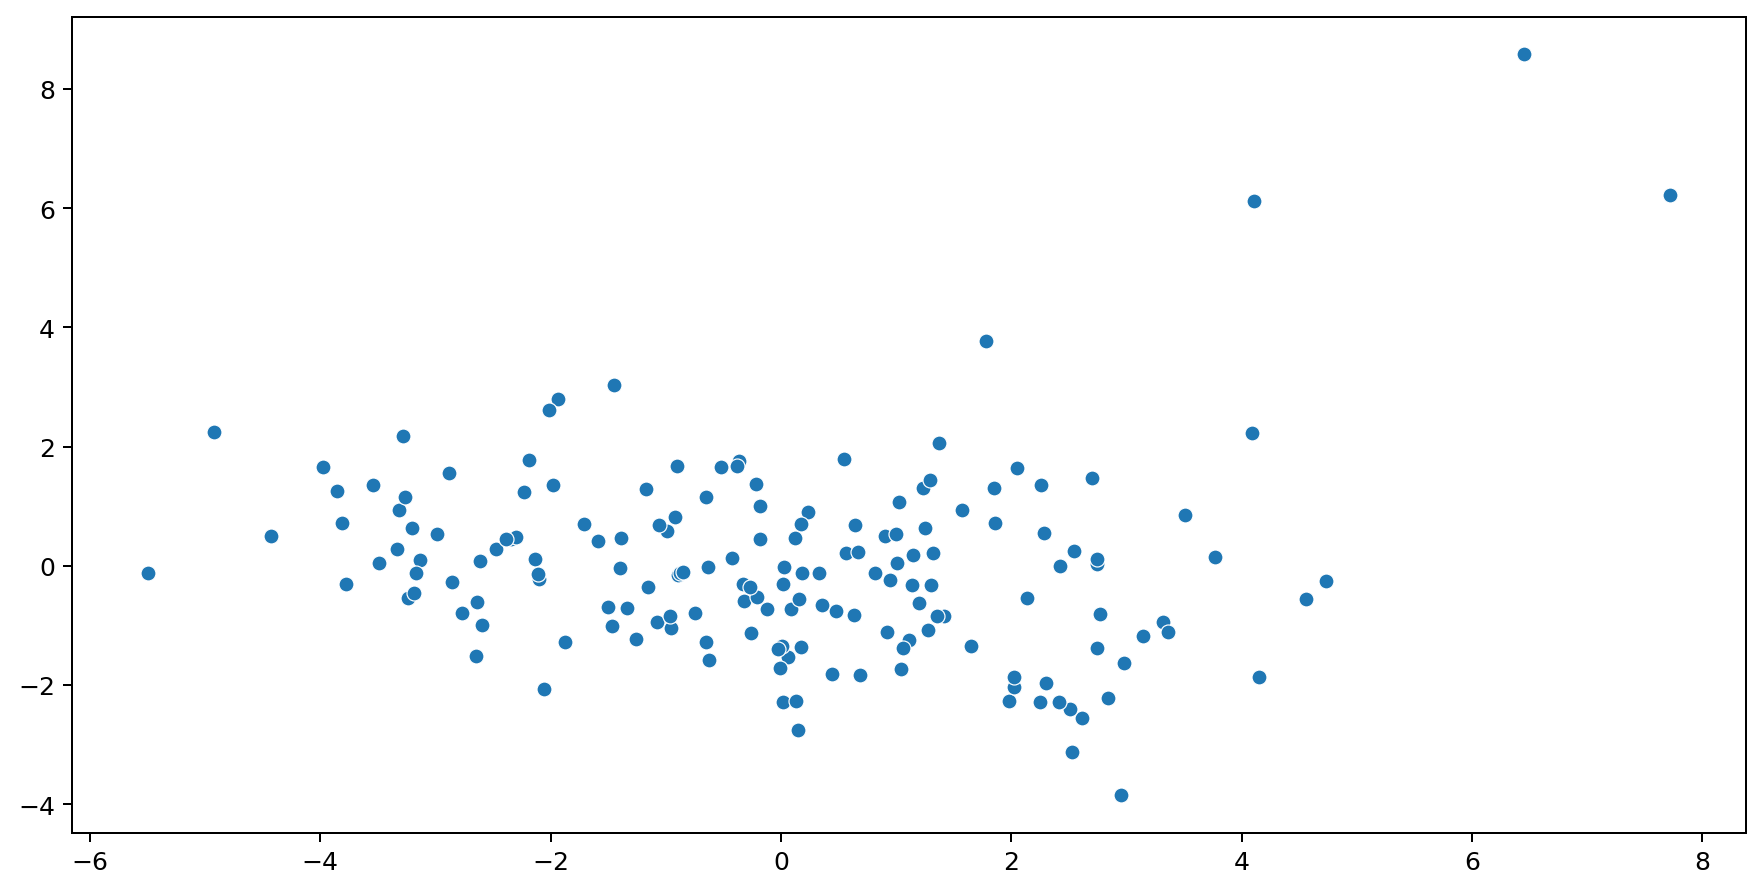

In [17]:
plt.figure(figsize=(12,6),dpi=180)
sns.scatterplot(x=pc[:,0],y=pc[:,1])

# Kmeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans()

In [20]:
cluster_default = model.fit_predict(pc)

<AxesSubplot:>

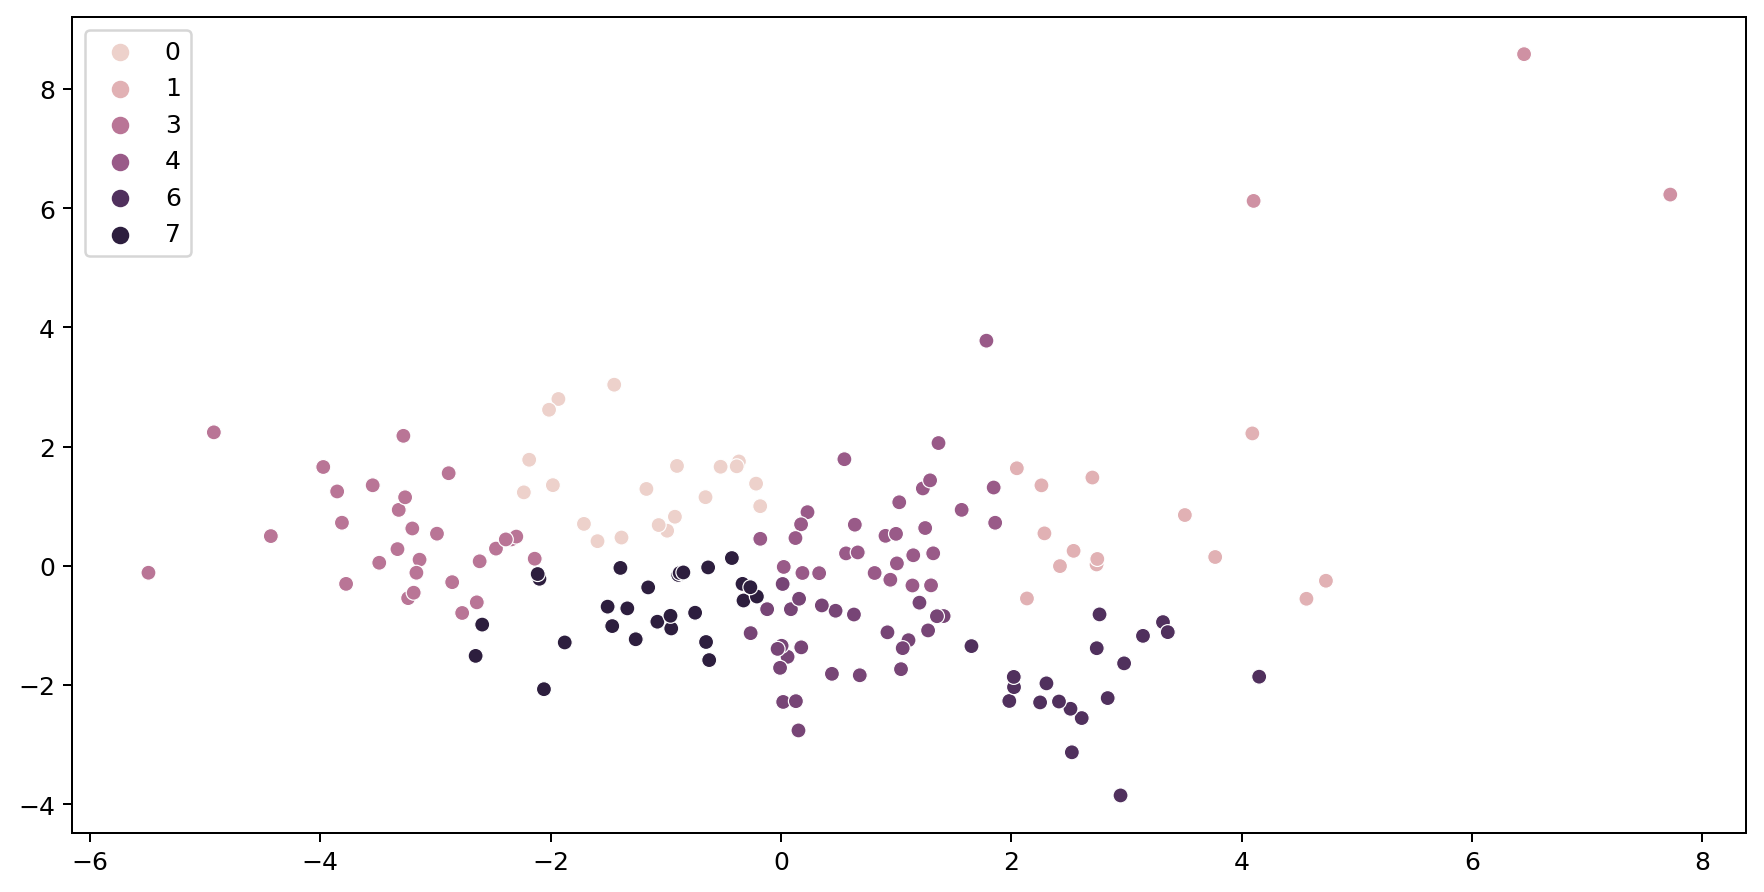

In [21]:
plt.figure(figsize=(12,6),dpi=180)
sns.scatterplot(x=pc[:,0],y=pc[:,1],hue=cluster_default)

# elbow method

In [22]:
inertia = []

for k in range(2,12):
    model = KMeans(n_clusters=k)
    cluster = model.fit_predict(pc)
    inertia.append(model.inertia_)
    

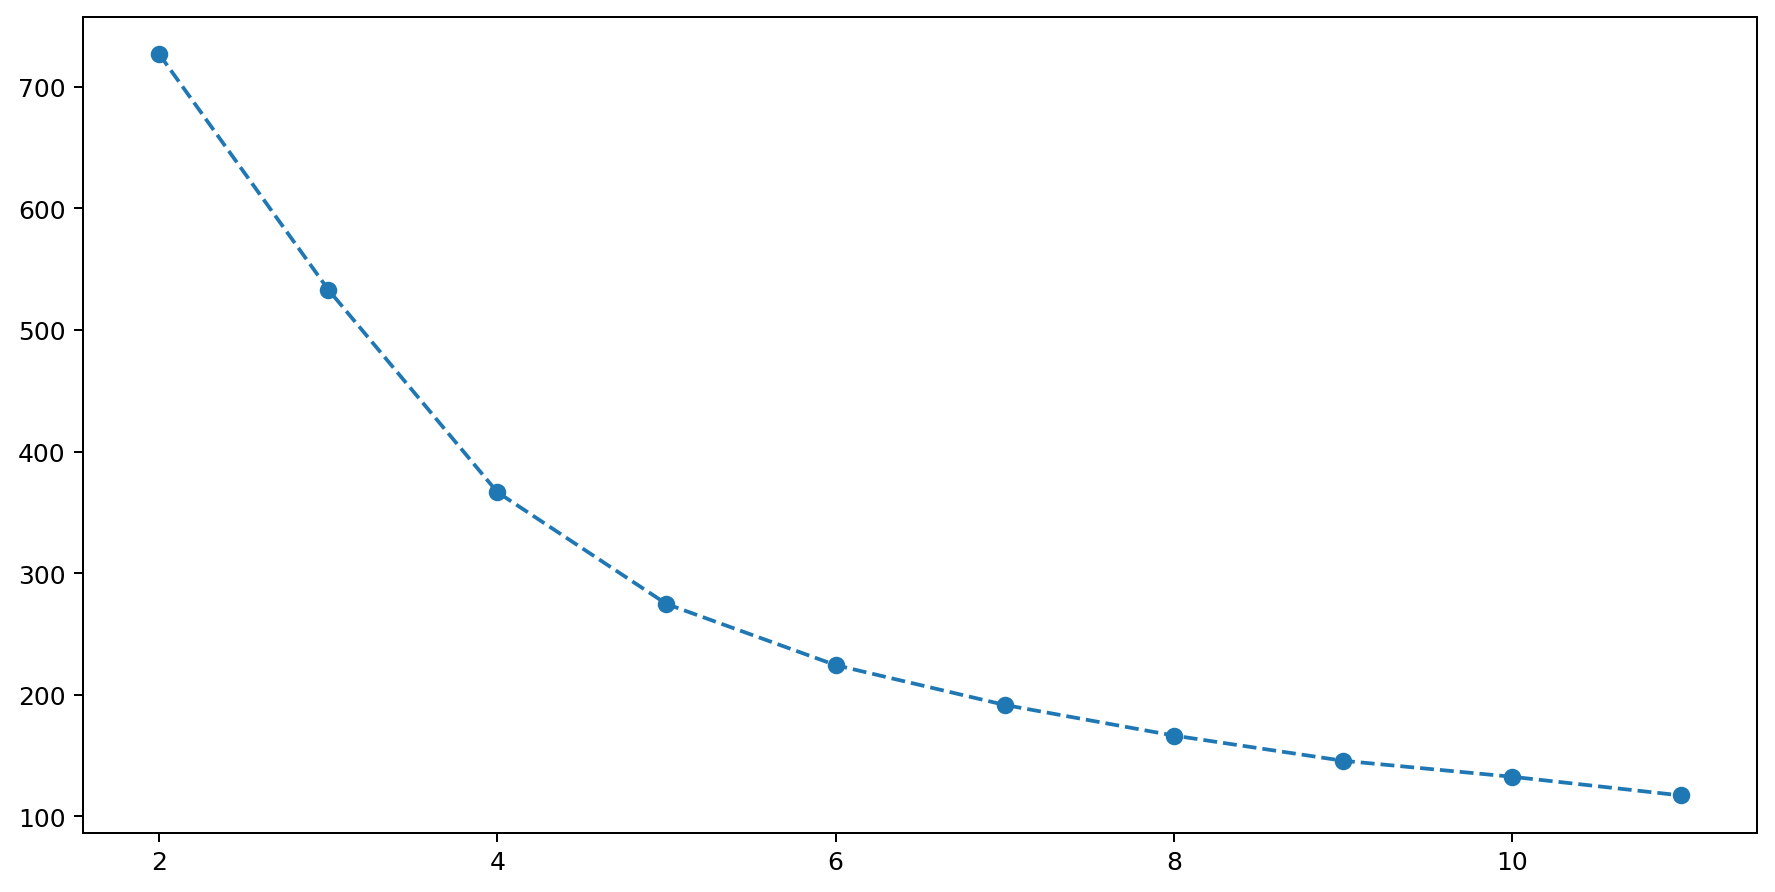

In [23]:
plt.figure(figsize=(12,6),dpi=180)
plt.plot(range(2,12),inertia,'o--')

# After Elbow Method

In [24]:
model = KMeans(n_clusters=4)

In [25]:
clusters = model.fit_predict(pc)

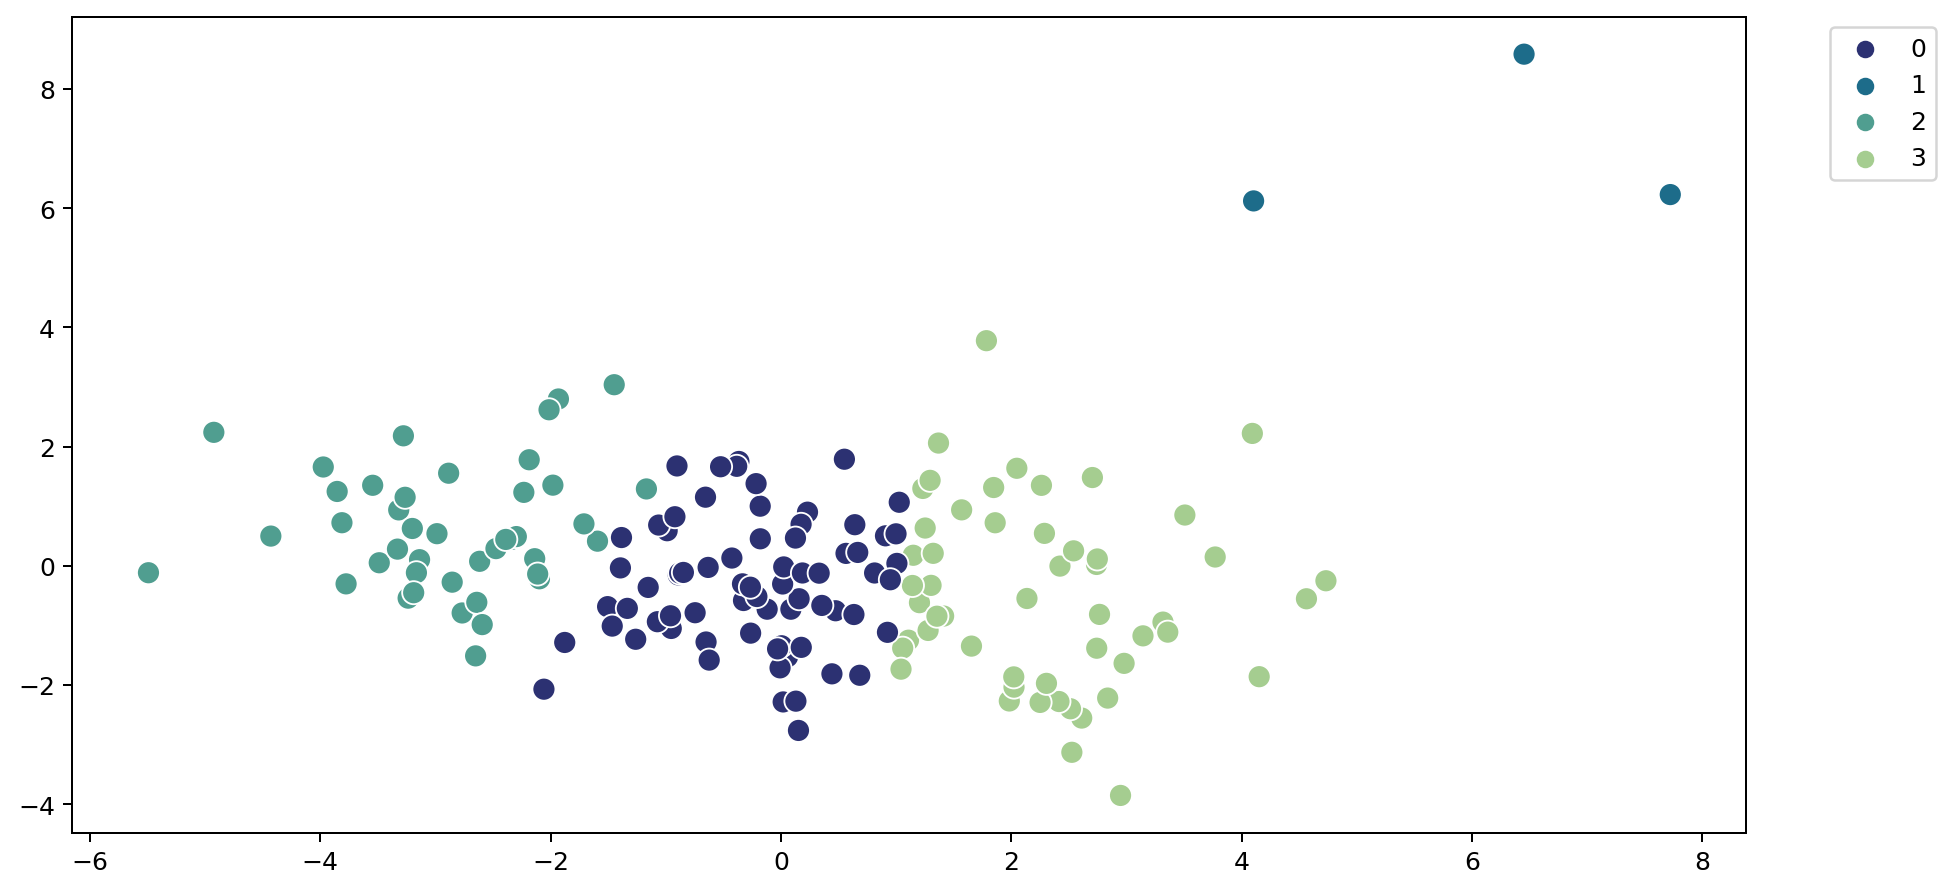

In [39]:
plt.figure(figsize=(12,6),dpi=180)
sns.scatterplot(x=pc[:,0],y=pc[:,1],hue=clusters,palette='crest_r',s=85)
plt.legend(loc=(1.05,0.8))